In [4]:
pip install xgboost --trusted-host pypi.org --trusted-host files.pythonhosted.org


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Load dataset
file_path = 'D:/Rakesh/CNS-data/26Dec2024/data_cleaned_CNS.csv'
df = pd.read_csv(file_path)

# Prepare data
X = df.drop(['SMILES', 'Class'], axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv('classification_model_results.csv', index=False)

# Print results
print(results_df)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.800797   0.801471  0.800797  0.800508  0.862122
1        Random Forest  0.866534   0.866730  0.866534  0.866463  0.922131
2                  SVM  0.838645   0.838703  0.838645  0.838591  0.910085
3                  KNN  0.786853   0.788123  0.786853  0.786353  0.859438
4        Decision Tree  0.802789   0.802775  0.802789  0.802779  0.803010
5          Naive Bayes  0.725100   0.739152  0.725100  0.719669  0.754221
6    Gradient Boosting  0.852590   0.853011  0.852590  0.852461  0.914325
7              XGBoost  0.852590   0.852707  0.852590  0.852526  0.925363


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


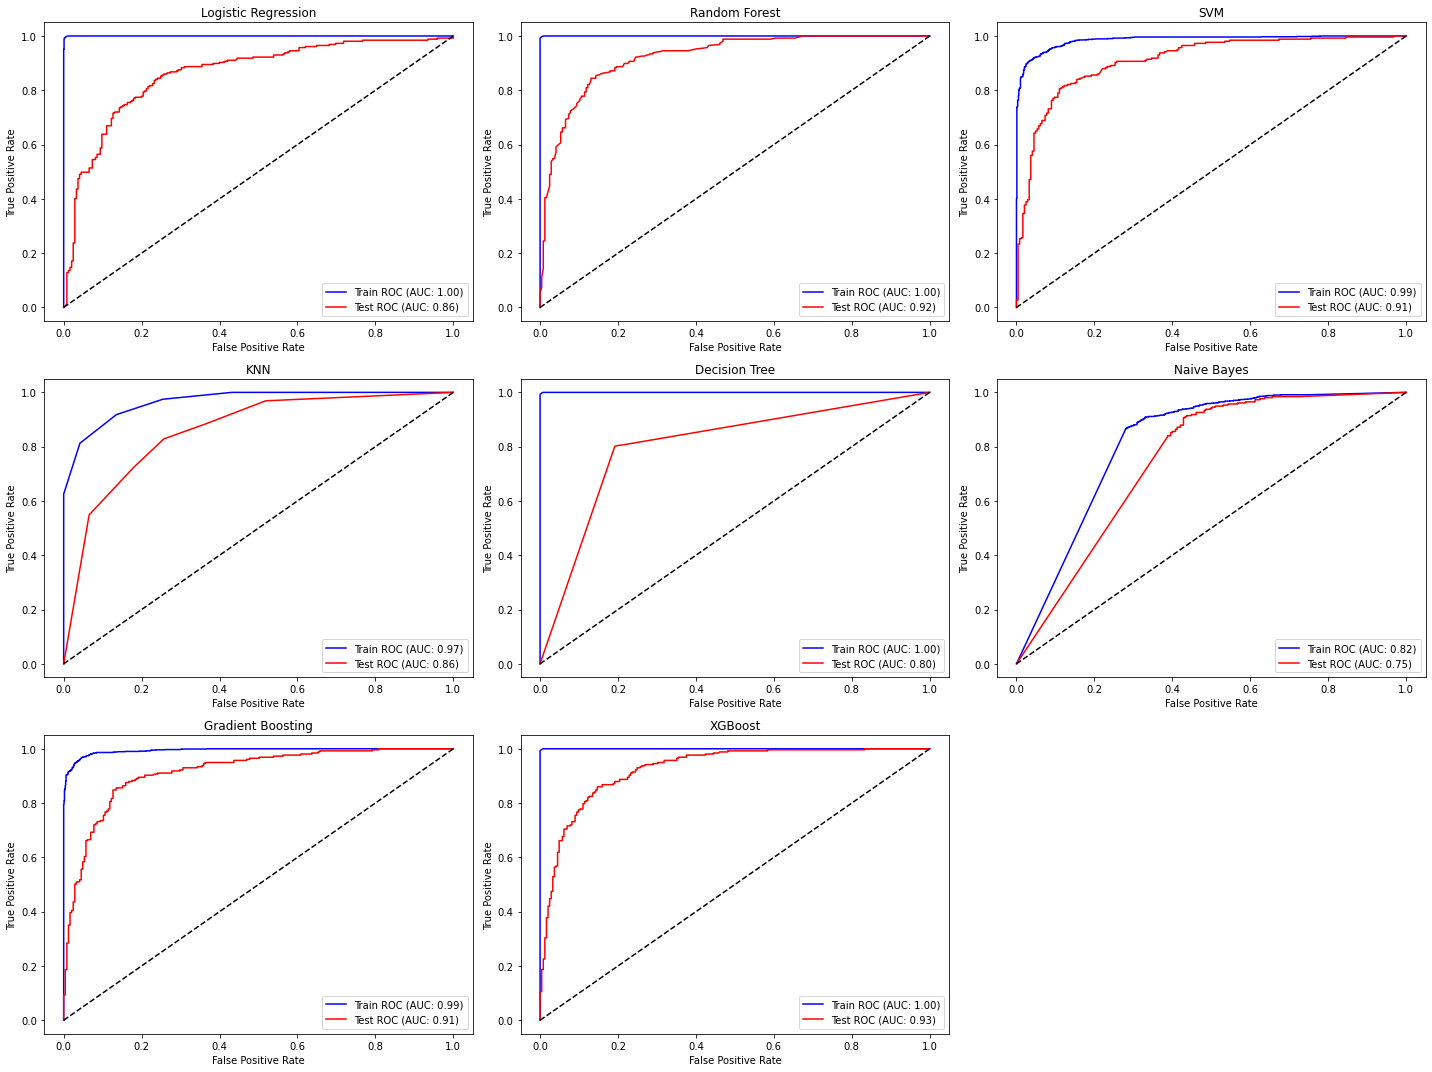

In [8]:
# Plot ROC curves
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
plt.figure(figsize=(20, 15))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    # Predictions and probabilities
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    # Plot in the same window with subplots
    plt.subplot(3, 3, i+1)
    plt.plot(fpr_train, tpr_train, label='Train ROC (AUC: {:.2f})'.format(roc_auc_score(y_train, y_train_prob)), color='blue')
    plt.plot(fpr_test, tpr_test, label='Test ROC (AUC: {:.2f})'.format(roc_auc_score(y_test, y_test_prob)), color='red')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.title(name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()